In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/facial-expression/fer2013/"))

# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/facial-expression/fer2013/'

In [1]:
%pip install tensorflow keras pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\admin\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (2.15.0)




[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# get the data
filname = 'dataset.csv'
label_map = ['Anger', 'Fear', 'Happy', 'Sad', 'Neutral']
names=['emotion','pixels','Usage']
df=pd.read_csv('dataset.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

emotion                                             pixels     Usage
0  emotion                                             pixels     Usage
1        0  181 181 193 187 171 47 29 19 32 34 76 125 184 ...  Training
2        0  227 231 179 67 76 78 89 86 77 67 50 38 36 44 6...  Training
3        0  15 9 10 14 14 15 17 16 17 27 42 51 70 88 92 95...  Training
4        0  167 169 164 161 132 74 56 67 102 116 153 211 1...  Training
5        0  127 120 72 65 125 101 53 72 102 95 86 99 114 1...  Training
6        0  44 45 45 45 49 49 47 52 56 17 6 15 30 31 15 38...  Training
7        0  53 61 69 83 55 52 50 50 94 105 119 129 137 147...  Training
8        0  251 184 118 62 22 26 71 161 197 194 177 164 11...  Training
9        0  164 114 100 89 69 81 69 68 58 74 91 92 93 89 8...  Training

In [4]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y


In [5]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

5


In [6]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [10]:
%pip install --upgrade tensorflow



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

ModuleNotFoundError: No module named 'keras.layers.convolutional'

In [13]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

ModuleNotFoundError: No module named 'keras.layers.normalization'

In [ ]:
path_model='model_filter.h5' # save model at this location after each epoch
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Train on 32298 samples, validate on 3589 samples
Epoch 1/20
32298/32298 [==============================] - 20s 622us/step - loss: 1.6698 - acc: 0.3533 - val_loss: 1.7831 - val_acc: 0.2756
Epoch 2/20
32298/32298 [==============================] - 14s 441us/step - loss: 1.3242 - acc: 0.4926 - val_loss: 1.3562 - val_acc: 0.4737
Epoch 3/20
32298/32298 [==============================] - 14s 437us/step - loss: 1.1302 - acc: 0.5764 - val_loss: 1.1762 - val_acc: 0.5492
Epoch 4/20
32298/32298 [==============================] - 14s 438us/step - loss: 1.0033 - acc: 0.6245 - val_loss: 1.1480 - val_acc: 0.5573
Epoch 5/20
32298/32298 [==============================] - 14s 437us/step - loss: 0.8746 - acc: 0.6794 - val_loss: 1.0692 - val_acc: 0.6010
Epoch 6/20
32298/32298 [==============================] - 14s 437us/step - loss: 0.7291 - acc: 0.7326 - val_loss: 1.1269 - val_acc: 0.5979
Epoch 7/20
32298/32298 [==============================] - 14s 436us/step - loss: 0.5656 - acc: 0.7965 - val_loss: 1.2

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [ ]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

In [ ]:
#import seaborn as sn
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.metrics import confusion_matrix
#%matplotlib inline
#cm = confusion_matrix(np.where(y_test == 1)[1], y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#df_cm = pd.DataFrame(cm, index = [i for i in "0123456"],
                  #columns = [i for i in "0123456"])
#plt.figure(figsize = (20,15))
#sn.heatmap(df_cm, annot=True)

**Real Time Expression Prediction**

/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


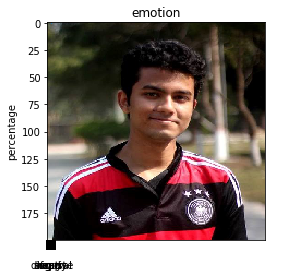

Expression Prediction: happy


In [ ]:
from skimage import io
img = image.load_img('../input/myimage/Shawon.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('../input/myimage/Shawon.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

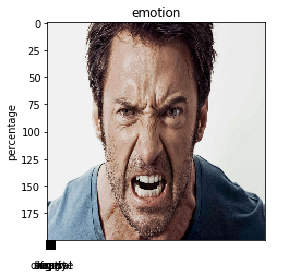

Expression Prediction: angry


In [ ]:
from skimage import io
img = image.load_img('../input/testimages/wallpaper2you_443897.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('../input/testimages/wallpaper2you_443897.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

**Live Demo of Production Level Project**

[Facial Expression Detection Web App](https://faceai.herokuapp.com/)